In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D


In [6]:
dataset=load_iris()

X=pd.DataFrame(dataset.data)
X.columns=['sepal_length','sepal_width','petal_length','petal_width']
print(X.head(5))

Y=pd.DataFrame(dataset.target)
Y.columns=['Targets']
print(Y.head(5))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   Targets
0        0
1        0
2        0
3        0
4        0


Text(0, 0.5, 'petal_width')

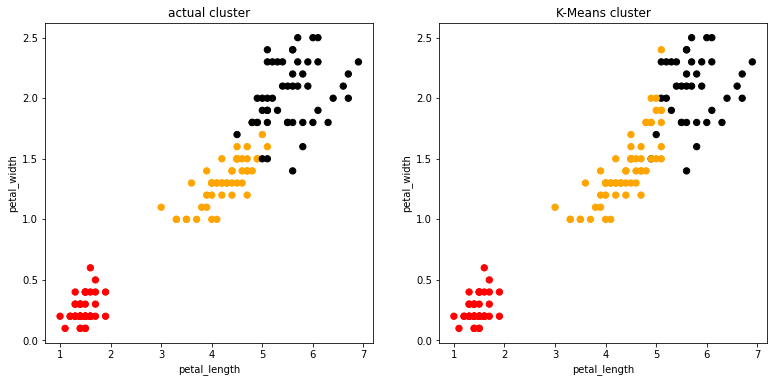

In [9]:
#k-means clustering
model=KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(20,20))
colormap=np.array(['red','orange','black'])

#plot the actual clusters
plt.subplot(3,3,1)
plt.scatter(X.petal_length,X.petal_width,c=colormap[Y.Targets],s=40)
plt.title('actual cluster')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

#plot the kmeans clusters
plt.subplot(3,3,2)
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_],s=40)
plt.title('K-Means cluster')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Text(0, 0.5, 'petal_width')

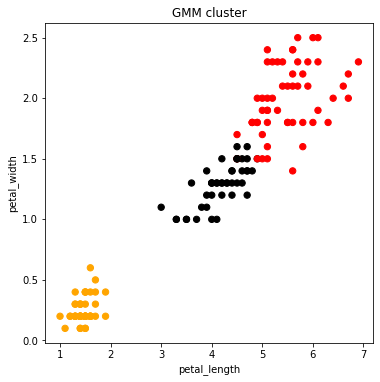

In [11]:
#Guassian mixture model clusteing
#use standard scaler
scale=preprocessing.StandardScaler()

#fit(x) method is used to train a machine learning model on a dataset
scale.fit(X)
scale_data=scale.transform(X)
Xg=pd.DataFrame(scale_data,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(Xg)
y_cluster_gmm=gmm.predict(Xg)

#plot the gmm clusters
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
plt.scatter(X.petal_length,X.petal_width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM cluster')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

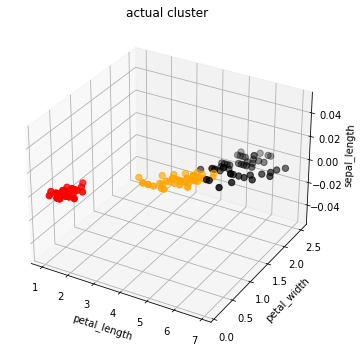

In [13]:
#k-means clustering
model=KMeans(n_clusters=3)
model.fit(X)
fig=plt.figure(figsize=(20,20))
colormap=np.array(['red','orange','black'])

#plot the K-Means clusters
fig1=fig.add_subplot(3,3,1,projection='3d')
fig1.scatter(X.petal_length,X.petal_width,c=colormap[Y.Targets],s=40)
fig1.set_title('actual cluster')
fig1.set_xlabel('petal_length')
fig1.set_ylabel('petal_width')
fig1.set_zlabel('sepal_length')

plt.show()